**Trabajo Final de Aprendizaje Automático.
Alumno: Leandro Vives.
Carrera de Doctorado en Ciencias Aplicadas y de la Ingeniería.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib.colors import ListedColormap
%matplotlib inline


DEFAULT_AXIS=[-0.2, 1.5, -0.3, 1.3]

def plot_dataset(X, y, axes=DEFAULT_AXIS):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes=DEFAULT_AXIS, plot_sv=False, plot_cont=True):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    if plot_cont:
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    if plot_sv:
        try:
            svs = clf[:-1].inverse_transform(clf.steps[-1][1].support_vectors_)
            plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
        except:
            print("LinearSVC no guarda los Support Vectors, para eso us SVC con kernel='linear'")
      
def plot_decision_boundary(clf, X, y, axes=DEFAULT_AXIS, alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [5]:
# Leo los datos
df1 = pd.read_csv('Hockey_Volley.csv',sep=';', header=0)
df1.head()

,Age_M,Height_M,Weight_M,Sport_M,Age_F,Height_F,Weight_F,Sport_F
0,27,184,75,Hockey,26,171,60,Volleyball
1,31,171,71,Hockey,17,175,60,Volleyball
2,29,200,96,Volleyball,33,171,61,Hockey
3,26,194,88,Volleyball,23,184,80,Volleyball
4,31,201,86,Volleyball,24,191,79,Volleyball


**Denomino a Hockey = 1 y Volleyball = 0.**


In [7]:
# Convierto el frame de pandas a un np.array
sport_1=df1.to_numpy()
print(sport_1[:10,:])

[[27 184 75 'Hockey' 26 171 60 'Volleyball']
 [31 171 71 'Hockey' 17 175 60 'Volleyball']
 [29 200 96 'Volleyball' 33 171 61 'Hockey']
 [26 194 88 'Volleyball' 23 184 80 'Volleyball']
 [31 201 86 'Volleyball' 24 191 79 'Volleyball']
 [34 183 78 'Hockey' 27 155 51 'Hockey']
 [25 208 93 'Volleyball' 28 186 80 'Volleyball']
 [31 200 97 'Volleyball' 20 192 68 'Volleyball']
 [29 203 106 'Volleyball' 27 185 72 'Volleyball']
 [31 186 78 'Hockey' 25 164 60 'Hockey']]


In [8]:
for i in range(0, len(sport_1[:,3])):
  if sport_1[i,3] == 'Hockey':
    sport_1[i,3] = 1
  else:
      sport_1[i,3] = 0


In [9]:
for i in range(0, len(sport_1[:,7])):
  if sport_1[i,7] == 'Hockey':
    sport_1[i,7] = 1
  else:
      sport_1[i,7] = 0


In [10]:
print(sport_1[:10,:])

[[27 184 75 1 26 171 60 0]
 [31 171 71 1 17 175 60 0]
 [29 200 96 0 33 171 61 1]
 [26 194 88 0 23 184 80 0]
 [31 201 86 0 24 191 79 0]
 [34 183 78 1 27 155 51 1]
 [25 208 93 0 28 186 80 0]
 [31 200 97 0 20 192 68 0]
 [29 203 106 0 27 185 72 0]
 [31 186 78 1 25 164 60 1]]


**Separo en grupos de hombres y mujeres.**

In [11]:
sport_1_M = sport_1[:,1:4]
sport_1_F = sport_1[:,5:8]
print(sport_1_M.shape,sport_1_F.shape)

(305, 3) (305, 3)


In [12]:
df_M = pd.DataFrame(sport_1_M)
df_M.columns = ['Height_M','Weight_M','Sport_M']
df_M.head()

,Height_M,Weight_M,Sport_M
0,184,75,1
1,171,71,1
2,200,96,0
3,194,88,0
4,201,86,0


In [13]:
df_F = pd.DataFrame(sport_1_F)
df_F.columns = ['Height_F','Weight_F','Sport_F']
df_F.head()

,Height_F,Weight_F,Sport_F
0,171,60,0
1,175,60,0
2,171,61,1
3,184,80,0
4,191,79,0


In [14]:
XM_1=sport_1_M[:,:2]
yM_1=sport_1_M[:,2]
XF_1=sport_1_F[:,:2]
yF_1=sport_1_F[:,2]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Divido en set de train y test.**

In [16]:
XM1_train, XM1_test, yM1_train, yM1_test = train_test_split(XM_1, yM_1, test_size=0.3, random_state=42)
XF1_train, XF1_test, yF1_train, yF1_test = train_test_split(XF_1, yF_1, test_size=0.3, random_state=42)

In [17]:
print(yM1_train.shape,yM1_test.shape)

(213,) (92,)


**Defino el tipo de número dentro de 'y' porque si no no funciona el entrenamiento.**

In [18]:
yM1_train=yM1_train.astype('int')
yM1_test=yM1_test.astype('int')
yF1_train=yF1_train.astype('int')
yF1_test=yF1_test.astype('int') 

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from scipy.stats import reciprocal,uniform

**Hago un escalado de los datos.**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XM_train_1 = scaler.fit_transform(XM1_train)
XM_test_1 = scaler.transform(XM1_test)
XF_train_1 = scaler.fit_transform(XF1_train)
XF_test_1 = scaler.transform(XF1_test)

In [21]:
print(XM_train_1.shape, yM1_train.shape)

(213, 2) (213,)


In [22]:
print(np.min(XM_train_1[:,0]),np.max(XM_train_1[:,0]))
print(np.min(XM_train_1[:,1]),np.max(XM_train_1[:,1]))
print(np.min(XF_train_1[:,0]),np.max(XF_train_1[:,0]))
print(np.min(XF_train_1[:,1]),np.max(XF_train_1[:,1]))

-3.0822569827372077 2.3983642866553567
-3.238322869387113 3.230730084230284
-1.9505370058990552 2.879320960347155
-1.7146134931379786 3.960988873674831


In [23]:
Axis_M= [-3.5, 3, -3.5, 3.5]
Axis_F= [-2, 3, -2, 4]

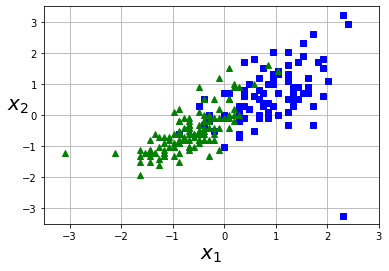

In [24]:
plot_dataset(XM_train_1, yM1_train, axes=Axis_M)

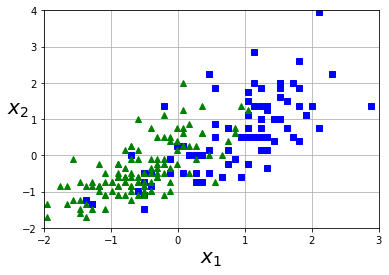

In [25]:
plot_dataset(XF_train_1, yF1_train, axes=Axis_F)

**Voy a entrenar para ambos grupos dos clasificadores y analizar cuál es el mejor: un regresor logístico para y un Support vector machine.**

In [26]:
#1 Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'saga', max_iter=200, random_state=42)
              
parametros_lr = {
    'penalty':['l2', 'l1'],
    'C': uniform(1,10)} 

In [27]:
#Support vector machine
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,uniform

SVM = svm.SVC(kernel = 'rbf', random_state= 3, probability=True)

parametros_svm = {
    "C": uniform(1,5),
    "gamma": reciprocal(0.1,0.2)}

**Entrenamiento para los datos de los hombres.**

In [28]:
lrM_clf = RandomizedSearchCV(lr, parametros_lr, scoring= 'accuracy', cv=5, random_state=3) 
search_lrM = lrM_clf.fit(XM_train_1, yM1_train)
print('The parameters combination that would give best accuracy is : ')
print(lrM_clf.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', lrM_clf.best_score_)

The parameters combination that would give best accuracy is : 
{'C': 3.4788829722603554, 'penalty': 'l2'}
The best accuracy achieved after parameter tuning via grid search is :  0.920265780730897


In [80]:
lrM_clf = LogisticRegression(penalty = 'l2', C = 3.47, random_state=42, solver = 'saga', max_iter=200)


Acc_lrM = cross_val_score(lrM_clf, XM_train_1,yM1_train, scoring= 'accuracy',cv=5)
print('la media del accuracy es: ',Acc_lrM.mean()*100,'% +-',Acc_lrM.std()*100)

Pre_lrM = cross_val_score(lrM_clf, XM_train_1,yM1_train, scoring= 'precision',cv=5)
print('la media del precision es: ',Pre_lrM.mean()*100,'% +-',Pre_lrM.std()*100)

Rec_lrM = cross_val_score(lrM_clf, XM_train_1,yM1_train, scoring= 'recall',cv=5)
print('la media del recall es: ',Rec_lrM.mean()*100,'% +-', Rec_lrM.std()*100)

la media del accuracy es:  92.02657807308971 % +- 1.0867393510828025
la media del precision es:  91.7454123975863 % +- 2.4700809653152964
la media del recall es:  95.23076923076923 % +- 3.925941638827466


In [29]:
lrM_clf.fit(XM_train_1, yM1_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=200,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff9258fdfd0>,
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_tra

In [30]:
svm_clf_M= RandomizedSearchCV (SVM, parametros_svm,
                             verbose=2,
                             n_iter=10, cv=5, random_state=3, scoring='accuracy')

search_svm_M = svm_clf_M.fit(XM_train_1, yM1_train)
print('The parameters combination that would give best accuracy is : ')
print(svm_clf_M.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', svm_clf_M.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=2.4545236945647217, gamma=0.1424867339493832 ..................
[CV] ... C=2.4545236945647217, gamma=0.1424867339493832, total=   0.0s
[CV] C=2.4545236945647217, gamma=0.1424867339493832 ..................
[CV] ... C=2.454

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=2.296262234537327, gamma=0.13333922038366894, total=   0.0s
[CV] C=2.296262234537327, gamma=0.13333922038366894 ..................
[CV] ... C=2.296262234537327, gamma=0.13333922038366894, total=   0.0s
[CV] C=2.296262234537327, gamma=0.13333922038366894 ..................
[CV] ... C=2.296262234537327, gamma=0.13333922038366894, total=   0.0s
The parameters combination that would give best accuracy is : 
{'C': 4.381274509900656, 'gamma': 0.15061472437155365}
The best accuracy achieved after parameter tuning via grid search is :  0.9156146179401994


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [35]:
svm_clf_M = svm.SVC( C= 4.381, kernel = 'rbf', gamma = 0.1506, probability=True, random_state= 3)

Acc_svm_M = cross_val_score(svm_clf_M, XM_train_1,yM1_train, scoring= 'accuracy',cv=5)
print('la media del accuracy es:',Acc_svm_M.mean()*100,'% +-',Acc_svm_M.std()*100)

Pre_svm_M = cross_val_score(svm_clf_M, XM_train_1,yM1_train, scoring= 'precision',cv=5)
print('la media del precision es:',Pre_svm_M.mean()*100,'% +-',Pre_svm_M.std()*100)

Rec_svm_M = cross_val_score(svm_clf_M, XM_train_1,yM1_train, scoring= 'recall',cv=5)
print('la media del recall es:',Rec_svm_M.mean()*100,'% +-',Rec_svm_M.std()*100)

la media del accuracy es: 91.56146179401993 % +- 1.8117738477655794
la media del precision es: 91.65994231211621 % +- 2.5727058001499814
la media del recall es: 94.43076923076923 % +- 4.0917292824318245


In [36]:
svm_clf_M.fit(XM_train_1, yM1_train)

SVC(C=4.381, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1506, kernel='rbf',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)

**Veo la frontera de decisión para los datos de training en los hombres para cada clasificador.**

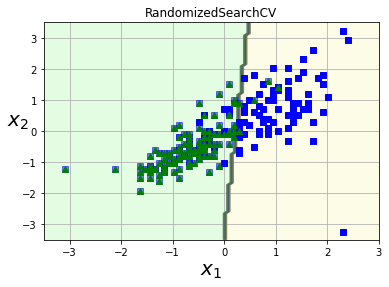

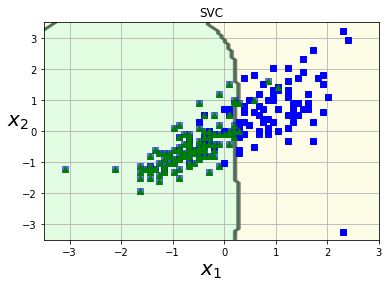

In [37]:
for clf in (lrM_clf, svm_clf_M):
    #plot_predictions(clf)
    plt.title(clf.__class__.__name__)
    plot_decision_boundary(clf,XM_train_1,yM1_train,axes=Axis_M)
    plot_dataset(XM_train_1,yM1_train,axes=Axis_M)
    plt.show()

**Veo la frontera de decisión para los datos de test en los hombres para cada clasificador.**

In [38]:
lrM_clf.fit(XM_test_1, yM1_test)
ylr_pred_M = lrM_clf.predict(XM_test_1)
CM_lr_M=confusion_matrix(yM1_test,ylr_pred_M)
print(CM_lr_M)

[[41  5]
 [ 5 41]]


In [39]:
svm_clf_M.fit(XM_test_1, yM1_test)
ysvm_pred_M = svm_clf_M.predict(XM_test_1)
CM_svm_M=confusion_matrix(yM1_test,ysvm_pred_M)
print(CM_svm_M)

[[41  5]
 [ 6 40]]


**Veo la frontera de decisión para los datos de test en los hombres para cada clasificador.**

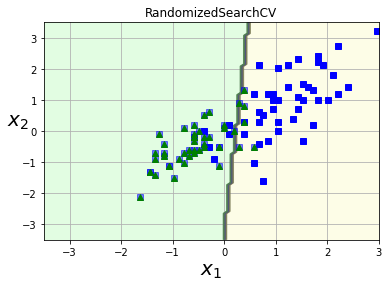

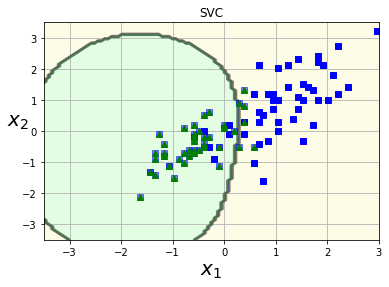

In [45]:
for clf in (lrM_clf, svm_clf_M):
    #plot_predictions(clf)
    plt.title(clf.__class__.__name__)
    plot_decision_boundary(clf,XM_test_1,yM1_test,axes=Axis_M)
    plot_dataset(XM_test_1,yM1_test,axes=Axis_M)
    plt.show()

**Ahora entreno los clasificadores para los grupos de mujeres.**

In [46]:
lrF_clf = RandomizedSearchCV(lr, parametros_lr, scoring= 'accuracy', cv=5, random_state=3) 
search_lrF = lrF_clf.fit(XF_train_1, yF1_train)
print('The parameters combination that would give best accuracy is : ')
print(lrF_clf.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', lrF_clf.best_score_)

The parameters combination that would give best accuracy is : 
{'C': 6.507979025745755, 'penalty': 'l1'}
The best accuracy achieved after parameter tuning via grid search is :  0.8591362126245847


In [47]:
lrF_clf = LogisticRegression(penalty = 'l1', C = 6.507, random_state=42, solver = 'saga', max_iter=200)

Acc_lrF = cross_val_score(lrF_clf, XF_train_1,yF1_train, scoring= 'accuracy',cv=5)
print('la media del accuracy es: ',Acc_lrF.mean()*100,'% +-',Acc_lrF.std()*100)

Pre_lrF = cross_val_score(lrF_clf, XF_train_1,yF1_train, scoring= 'precision',cv=5)
print('la media del precision es: ',Pre_lrF.mean()*100,'% +-',Pre_lrF.std()*100)

Rec_lrF = cross_val_score(lrF_clf, XF_train_1,yF1_train, scoring= 'recall',cv=5)
print('la media del recall es: ',Rec_lrF.mean()*100,'% +-', Rec_lrF.std()*100)

la media del accuracy es:  85.91362126245848 % +- 5.9647274667874886
la media del precision es:  85.59986450331279 % +- 6.460320653903276
la media del recall es:  93.07692307692307 % +- 6.153846153846154


In [48]:
lrF_clf.fit(XF_train_1, yF1_train)

LogisticRegression(C=6.507, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
svm_clf_F = RandomizedSearchCV (SVM, parametros_svm,
                             verbose=2,
                             n_iter=10, cv=5, random_state=3, scoring='accuracy')

search_svm_F = svm_clf_F.fit(XF_train_1, yF1_train)
print('The parameters combination that would give best accuracy is : ')
print(svm_clf_F.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', svm_clf_F.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=3.7539895128728773, gamma=0.16337053677214383 .................
[CV] .. C=3.7539895128728773, gamma=0.16337053677214383, total=   0.0s
[CV] C=2.4545236945647217, gamma=0.1424867339493832 ..................
[CV] ... C=2.4545236945647217, gamma=0.1424867339493832, total=   0.0s
[CV] C=2.4545236945647217, gamma=0.1424867339493832 ..................
[CV] ... C=2.454

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=4.381274509900656, gamma=0.15061472437155365, total=   0.0s
[CV] C=4.381274509900656, gamma=0.15061472437155365 ..................
[CV] ... C=4.381274509900656, gamma=0.15061472437155365, total=   0.0s
[CV] C=4.381274509900656, gamma=0.15061472437155365 ..................
[CV] ... C=4.381274509900656, gamma=0.15061472437155365, total=   0.0s
[CV] C=4.381274509900656, gamma=0.15061472437155365 ..................
[CV] ... C=4.381274509900656, gamma=0.15061472437155365, total=   0.0s
[CV] C=1.1199094118858268, gamma=0.14730986912934205 .................
[CV] .. C=1.1199094118858268, gamma=0.14730986912934205, total=   0.0s
[CV] C=1.1199094118858268, gamma=0.14730986912934205 .................
[CV] .. C=1.1199094118858268, gamma=0.14730986912934205, total=   0.0s
[CV] C=1.1199094118858268, gamma=0.14730986912934205 .................
[CV] .. C=1.1199094118858268, gamma=0.14730986912934205, total=   0.0s
[CV] C=1.1199094118858268, gamma=0.14730986912934205 .................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [50]:
svm_clf_F = svm.SVC( C= 1.627, kernel = 'rbf', gamma = 0.1154, probability=True, random_state= 3)

Acc_svm_F = cross_val_score(svm_clf_F, XF_train_1,yF1_train, scoring= 'accuracy',cv=5)
print('la media del accuracy es:',Acc_svm_F.mean()*100,'% +-',Acc_svm_F.std()*100)

Pre_svm_F = cross_val_score(svm_clf_F, XF_train_1,yM1_train, scoring= 'precision',cv=5)
print('la media del precision es:',Pre_svm_F.mean()*100,'% +-',Pre_svm_F.std()*100)

Rec_svm_F = cross_val_score(svm_clf_F, XF_train_1,yM1_train, scoring= 'recall',cv=5)
print('la media del recall es:',Rec_svm_F.mean()*100,'% +-',Rec_svm_F.std()*100)

la media del accuracy es: 84.98338870431894 % +- 6.112154279899458
la media del precision es: 59.15836101882614 % +- 0.9000808760228589
la media del recall es: 100.0 % +- 0.0


In [51]:
svm_clf_F.fit(XF_train_1, yF1_train)

SVC(C=1.627, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1154, kernel='rbf',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)

**Veo la frontera de decisión para los datos de training en las mujeres para cada clasificador.**

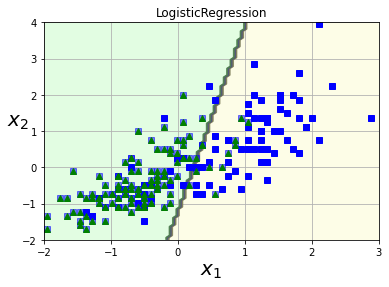

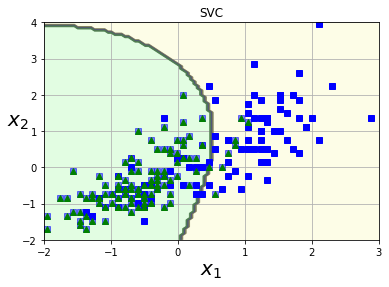

In [52]:
for clf in (lrF_clf, svm_clf_F):
    #plot_predictions(clf)
    plt.title(clf.__class__.__name__)
    plot_decision_boundary(clf,XF_train_1,yF1_train,axes=Axis_F)
    plot_dataset(XF_train_1,yF1_train,axes=Axis_F)
    plt.show()

In [53]:
lrF_clf.fit(XF_test_1, yF1_test)
ylr_pred_F = lrF_clf.predict(XF_test_1)
CM_lr_F=confusion_matrix(yF1_test,ylr_pred_F)
print(CM_lr_F)

[[27 10]
 [ 5 50]]


In [54]:
svm_clf_F.fit(XF_test_1, yF1_test)
ysvm_pred_F = svm_clf_F.predict(XF_test_1)
CM_svm_F=confusion_matrix(yF1_test,ysvm_pred_F)
print(CM_svm_F)

[[27 10]
 [ 2 53]]


**Veo la frontera de decisión para los datos de test en los mujeres para cada clasificador.**

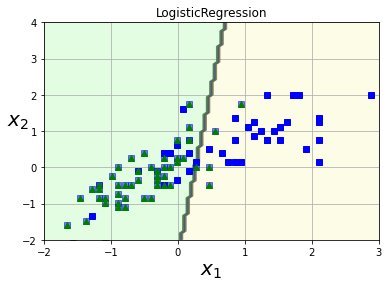

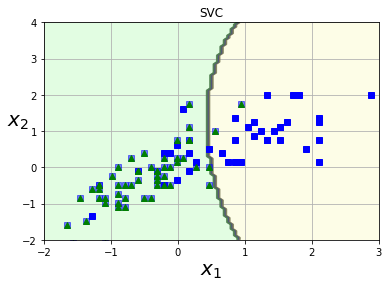

In [55]:
for clf in (lrF_clf, svm_clf_F):
    #plot_predictions(clf)
    plt.title(clf.__class__.__name__)
    plot_decision_boundary(clf,XF_test_1,yF1_test,axes=Axis_F)
    plot_dataset(XF_test_1,yF1_test,axes=Axis_F)
    plt.show()

In [56]:
lrF_clf.fit(XF_test_1, yF1_test)
ylr_pred_F = lrF_clf.predict(XF_test_1)
CM_lr_F=confusion_matrix(yF1_test,ylr_pred_F)
print(CM_lr_F)

[[27 10]
 [ 5 50]]


In [57]:
svm_clf_F.fit(XF_test_1, yF1_test)
ysvm_pred_F = svm_clf_F.predict(XF_test_1)
CM_svm_F=confusion_matrix(yF1_test,ysvm_pred_F)
print(CM_svm_F)

[[27 10]
 [ 2 53]]
